### Sample program for Neural Network  

#### Import libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Read CSV file  

In [2]:
dat = np.loadtxt('data/points_and.csv', delimiter=',', skiprows=1)
data_train = dat[:, :-1]
class_train = dat[:, -1]
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


#### Making model and exec training  

In [3]:
%%time
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])
fit_log = model.fit(data_train, class_train, epochs=1000, batch_size=1)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 1s 143ms/sample - loss: 0.7894 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7814 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7735 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7658 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7583 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7510 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7438 - accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7369 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7301 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.72

#### Graph for accuracy  

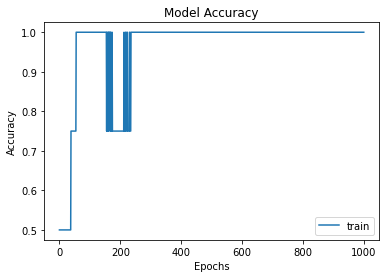

In [4]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#### Prediction for training data  

In [5]:
pred = model.predict(data_train)
print(pred)

[[0.04157731]
 [0.22870743]
 [0.22397535]
 [0.6636186 ]]


#### Teacher signal for separating hyperplane  

In [6]:
t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1[:, 0]
t1_y = t1[:, 1]
t0_x = t0[:, 0]
t0_y = t0[:, 1]

#### Grid points for separating hyperplane  

In [7]:
g = np.loadtxt('data/grid01_21x21.csv', delimiter=',')
print(g.shape)
print(model.predict(g).shape)
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1[:, 0]
g1_y = g1[:, 1]
g0_x = g0[:, 0]
g0_y = g0[:, 1]

(441, 2)
(441, 1)


#### Plot of separating hyperplane  

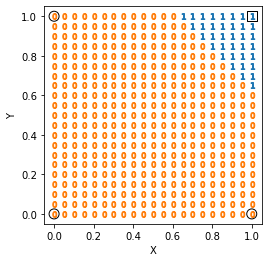

In [8]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()